## Google Foobar Challenge

I entered the foobar challenge quite late (in 2022 !) at the end of my google data analytics course. I have added solutions to all problems attempted in this LONG notebook which were written by me or referred from online sources.

Level 1&2 were easy to solve but beyond that I had seriously refer a lot of stackover questions related to challenges to understand about various approaches. Whenever good resources were found it's added before individual question solution ideas


<div class="alert alert-warning">
    <b>Imp</b>: for those who are still trying this out, give a shot by yourself referrring to before referring to online help !!
</div>

In [3]:
#google foobar challenge 1: partition number into largest possible squarres iteratively

import numpy as np

def solution(area):
    area_copy=area
    sols=[]
    sol=np.int64(np.sqrt(area_copy))
    #subtracts largest possible int sq from area and appends sq to solution
    while sol>1:
        sols.append(pow(sol,2))
        area_copy=area_copy-pow(sol,2)
        sol=np.int64(np.sqrt(area_copy))
    while area_copy>0:
        sols.append(1)
        area_copy=area_copy-1
    
    return  sols

In [4]:
solution(10) # 10 can partioned as 9 (3^2) + 1

[9, 1]

## Level 2  Google Foo
------

### Gearing Up for Destruction 

As Commander Lambda's personal assistant, you've been assigned the task of configuring the LAMBCHOP doomsday device's axial orientation gears. It should be pretty simple -- just add gears to create the appropriate rotation ratio. But the problem is, due to the layout of the LAMBCHOP and the complicated system of beams and pipes supporting it, the pegs that will support the gears are fixed in place.

The LAMBCHOP's engineers have given you lists identifying the placement of groups of pegs along various support beams. You need to place a gear on each peg (otherwise the gears will collide with unoccupied pegs). The engineers have plenty of gears in all different sizes stocked up, so you can choose gears of any size, from a radius of 1 on up. Your goal is to build a system where the last gear rotates at twice the rate (in revolutions per minute, or rpm) of the first gear, no matter the direction. Each gear (except the last) touches and turns the gear on the next peg to the right.

Given a list of distinct positive integers named pegs representing the location of each peg along the support beam, write a function solution(pegs) which, if there is a solution, returns a list of two positive integers a and b representing the numerator and denominator of the first gear's radius in its simplest form in order to achieve the goal above, such that radius = a/b. The ratio a/b should be greater than or equal to 1. Not all support configurations will necessarily be capable of creating the proper rotation ratio, so if the task is impossible, the function solution(pegs) should return the list [-1, -1].

For example, if the pegs are placed at [4, 30, 50], then the first gear could have a radius of 12, the second gear could have a radius of 14, and the last one a radius of 6. Thus, the last gear would rotate twice as fast as the first one. In this case, pegs would be [4, 30, 50] and solution(pegs) should return [12, 1].

The list pegs will be given sorted in ascending order and will contain at least 2 and no more than 20 distinct positive integers, all between 1 and 10000 inclusive.

### Solution Idea:
 
 
    Solves gear peg question by solving a linear equation of form:
    Ar=p
    and checks whether all elements in r >1
    
    [A] matrix represents system of equations
    For example when 3 peg locations given 
    p=[p0, p1, p2] --. positions of pegs of gears
    r: vector of radii of gear (in code np.array) with r[0] for fisrt gear
    p'=[p1-p0, p2-p1, 0]
    A=[ 1 1 0,
        0 1 1,
        1 0 -2]
    
    This models eq:
    r0+r1=p1-p0
    r1+r2=p2-p1
    r0-2*r2=0
    
    last set of equation defined by constrain that final gear ratio is 2
    
 

In [5]:
from fractions import Fraction
import numpy as np

def solution(pegs):
    
    n=len(pegs) # For matrix size for solving gear constraints
    
    A=np.identity(n)+np.diag([1]*(n-1),1)
    #setting the last row correctly as per eq r_0 -2*r_n=0
    A[-1][0]=1
    A[-1][-1]=-2
    
    #generate p' vectors
    p_dash=np.diff(pegs)
    p_dash=np.append(p_dash,0)
    
    #Creating r vector by solving lin eq
    radii=np.linalg.solve(A,p_dash)
    
    #return radii
    
    #Check if any r<1 and return r0 accordingly
    if np.sum([bool(r<1) for r in radii]) >0:
        return [-1,-1]
    else:
        return [Fraction(radii[0]).limit_denominator().numerator,\
                Fraction(radii[0]).limit_denominator().denominator]
    

In [6]:
solution([4,30,50])

[12, 1]

## Level 3: The Grandest Staircase Of Them All
----


With the LAMBCHOP doomsday device finished, Commander Lambda is preparing to debut on the galactic stage -- but in order to make a grand entrance, Lambda needs a grand staircase! As the Commander's personal assistant, you've been tasked with figuring out how to build the best staircase EVER. 

Lambda has given you an overview of the types of bricks available, plus a budget. You can buy different amounts of the different types of bricks (for example, 3 little pink bricks, or 5 blue lace bricks). Commander Lambda wants to know how many different types of staircases can be built with each amount of bricks, so they can pick the one with the most options. 

Each type of staircase should consist of 2 or more steps.  No two steps are allowed to be at the same height - each step must be lower than the previous one. All steps must contain at least one brick. A step's height is classified as the total amount of bricks that make up that step.
For example, when N = 3, you have only 1 choice of how to build the staircase, with the first step having a height of 2 and the second step having a height of 1: (# indicates a brick)

#
##
21

When N = 4, you still only have 1 staircase choice:

#
#
##
31
 
But when N = 5, there are two ways you can build a staircase from the given bricks. The two staircases can have heights (4, 1) or (3, 2), as shown below:

#
#
#
##
41

#
##
##
32

Write a function called solution(n) that takes a positive integer n and returns the number of different staircases that can be built from exactly n bricks. n will always be at least 3 (so you can have a staircase at all), but no more than 200, because Commander Lambda's not made of money!



### Test cases

-- Python cases --
Input:
solution.solution(200)
Output:
    487067745

Input:
solution.solution(3)
Output:
    1


### Solution Ideas


* The fundamental idea of solving this involves partition theoram: number of distinct partions of a number which is also equal to number of odd partitions. There are implementations availble which count odd partitions which one could explore.

The solution I wrote is based on stack-overflow answer: https://stackoverflow.com/questions/66779188/solve-google-foobar-staircase-problem-with-python

* Let $S^N_k$ be the number of distinct partitions of N such that each of the summands is from 1 to k .
* This follows the recurrence, $S^N_k = S^{N-k}_{k-1} + S^N_{k-1}$

>Answer to the problem: $S^N_{N-1}$


$S^8_i=0$ for i $\in {1,2,3}$

$S^8_4= S^4_3+S^8_3$ now $S^4_3$ =1 since only one possible soln (3,1)

$S^8_5=S^3_4+S^8_4$ and $S^8_4 =1, S^3_4=2$, so $S^8_5=3$

$S^8_6=S^2_5+S^8_5=1+3=4$

$S^8_7=S^1_6+S^8_6=1+4=5$

In [63]:
def solution(bricks):
    if bricks<3:
        return 0
    Partitions= [1]+[0]*bricks
    for i in range(1, bricks):  
        for j in range(bricks, i-1, -1): 
            Partitions[j] += Partitions[j-i] 
            
        #print(i, j, Partitions) # Comment this off   
    return Partitions[bricks]

In [64]:
solution(8)

5

In [65]:
solution(200)

487067745

## Level 3: Maze Bunny Problem

-----

You're awfully close to destroying the LAMBCHOP doomsday device and freeing Commander Lambda's bunny workers, but once they're free of the work duties the bunnies are going to need to escape Lambda's space station via the escape pods as quickly as possible. Unfortunately, the halls of the space station are a maze of corridors and dead ends that will be a deathtrap for the escaping bunnies. Fortunately, Commander Lambda has put you in charge of a remodeling project that will give you the opportunity to make things a little easier for the bunnies. Unfortunately (again), you can't just remove all obstacles between the bunnies and the escape pods - at most you can remove one wall per escape pod path, both to maintain structural integrity of the station and to avoid arousing Commander Lambda's suspicions.

You have maps of parts of the space station, each starting at a work area exit and ending at the door to an escape pod. The map is represented as a matrix of 0s and 1s, where 0s are passable space and 1s are impassable walls. The door out of the station is at the top left (0,0) and the door into an escape pod is at the bottom right (w-1,h-1).

Write a function solution(map) that generates the length of the shortest path from the station door to the escape pod, where you are allowed to remove one wall as part of your remodeling plans. The path length is the total number of nodes you pass through, counting both the entrance and exit nodes. The starting and ending positions are always passable (0). The map will always be solvable, though you may or may not need to remove a wall. The height and width of the map can be from 2 to 20. Moves can only be made in cardinal directions; no diagonal moves are allowed.
Languages


Your code should pass the following test cases. Note that it may also be run against hidden test cases not shown here.

-- Python cases -- Input: solution.solution([[0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [1, 1, 1, 0]]) Output: 7

Input: solution.solution([[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0]]) Output: 11

### Solution Ideas

To solve binary maze I used BFS to find a solution for a given grid and implemented it inside a loop whihc generated grid by converting one of 1-->0. 


In [1]:
from collections import deque
from copy import deepcopy
import numpy as np

# Function to find the shortest path between
def shortest_path(grid):
     
    rows=len(grid)
    cols=len(grid[0])

    #Check whether given cell(row,col) is valid
    def isValid(row, col):
        return (0<=row<rows and 0<=col<cols)
    
    #Initialise matrix to check visited posints
    visited = np.array([[False]*cols]*rows)
    visited[0][0] = True
     
    # Create a queue for BFS
    q = deque()   
    #Enqueue source cell with dist 0
    q.append({(0,0):0})
     
    # Do a BFS starting from source cell
    while q:
        curr = q.popleft() # Dequeue the front cell
        dist=curr.values()[0]
        (x,y)=curr.keys()[0]
        
        #Check whether destination cell reached or not
        if (x,y)==(rows-1,cols-1):
            #print(np.matrix(grid),dist+1)
            return dist+1
         
        # Otherwise enqueue its adjacent cells
        adj_update=[(-1,0),(0,-1),(1,0),(0,1)]
        for cell in adj_update:
            row = x + cell[0]
            col = y + cell[1]
            
            if (isValid(row,col) and
                grid[row][col] == 0 
                and not visited[row][col]):

                visited[row][col] = True # Mark visited Row
                q.append({(row,col):dist+1})            
    # Return -1 if destination cannot be reached

    return -1

def solution(grid):
    width = len(grid[0])
    height = len(grid)
    ones = [(y,x) for x in range(width) for y in range(height) if grid[y][x] == 1]
    min_length = float('inf')
    for x,y in ones:
        newgrid = deepcopy(grid)
        newgrid[x][y] = 0
        if min_length==width+height-1:
            break
        else:
            path=shortest_path(newgrid)
            if path>0:
                min_length = min(min_length, path)
    return min_length

In [2]:
solution([[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0]])

11

## Level 3: Doomsday Fuel

--------

Making fuel for the LAMBCHOP's reactor core is a tricky process because of the exotic matter involved. It starts as raw ore, then during processing, begins randomly changing between forms, eventually reaching a stable form. There may be multiple stable forms that a sample could ultimately reach, not all of which are useful as fuel. 

Commander Lambda has tasked you to help the scientists increase fuel creation efficiency by predicting the end state of a given ore sample. You have carefully studied the different structures that the ore can take and which transitions it undergoes. It appears that, while random, the probability of each structure transforming is fixed. That is, each time the ore is in 1 state, it has the same probabilities of entering the next state (which might be the same state).  You have recorded the observed transitions in a matrix. The others in the lab have hypothesized more exotic forms that the ore can become, but you haven't seen all of them.

Write a function solution(m) that takes an array of array of nonnegative ints representing how many times that state has gone to the next state and return an array of ints for each terminal state giving the exact probabilities of each terminal state, represented as the numerator for each state, then the denominator for all of them at the end and in simplest form. The matrix is at most 10 by 10. It is guaranteed that no matter which state the ore is in, there is a path from that state to a terminal state. That is, the processing will always eventually end in a stable state. The ore starts in state 0. The denominator will fit within a signed 32-bit integer during the calculation, as long as the fraction is simplified regularly. 

For example, consider the matrix m:
[
  [0,1,0,0,0,1],  # s0, the initial state, goes to s1 and s5 with equal probability
  [4,0,0,3,2,0],  # s1 can become s0, s3, or s4, but with different probabilities
  [0,0,0,0,0,0],  # s2 is terminal, and unreachable (never observed in practice)
  [0,0,0,0,0,0],  # s3 is terminal
  [0,0,0,0,0,0],  # s4 is terminal
  [0,0,0,0,0,0],  # s5 is terminal
]
So, we can consider different paths to terminal states, such as:
s0 -> s1 -> s3
s0 -> s1 -> s0 -> s1 -> s0 -> s1 -> s4
s0 -> s1 -> s0 -> s5
Tracing the probabilities of each, we find that
s2 has probability 0
s3 has probability 3/14
s4 has probability 1/7
s5 has probability 9/14
So, putting that together, and making a common denominator, gives an answer in the form of
[s2.numerator, s3.numerator, s4.numerator, s5.numerator, denominator] which is
[0, 3, 2, 9, 14].


#### Test cases

--------
Your code should pass the following test cases.
Note that it may also be run against hidden test cases not shown here.

-- Python cases --
Input:
solution.solution([[0, 2, 1, 0, 0], [0, 0, 0, 3, 4], [0, 0, 0, 0, 0], [0, 0, 0, 0,0], [0, 0, 0, 0, 0]])
Output:
    [7, 6, 8, 21]

Input:
solution.solution([[0, 1, 0, 0, 0, 1], [4, 0, 0, 3, 2, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
Output:
    [0, 3, 2, 9, 14]

Use verify [file] to test your solution and see how it does. When you are finished editing your code, use submit [file] to submit your answer. If your solution passes the test cases, it will be removed from your home folder.


-------

### Solution Ideas


Problem can be modelled using an absorbing markov chain.

ref1: https://www.math.umd.edu/~immortal/MATH401/book/ch_absorbing_markov_chains.pdf

ref2: https://www.youtube.com/watch?v=bTeKu7WdbT8


In [4]:
from fractions import Fraction
import numpy as np

#Generate Transition matrix from input
def convert_to_prob(mat):
    n=len(mat)
    Pmat=np.zeros((n,n))
    
    for x in range(len(mat)):
        if np.sum(mat[x])>0:
            Pmat[x]=np.array(mat[x])/float(np.sum(mat[x]))
        else:
            Pmat[x][x]=1.0
    #Result=[[Fraction(Pmat[x,y]).limit_denominator() for y in range(n)] for x in range(n)]
    return Pmat

#Calculates FR matrix of abs. markov chain which gives result
#R holds prob trans->terminal
#Q matrix hold prob trans state -> trans state
#FR=R*Inv(I-Q)
def solution(inp1):
    T=convert_to_prob(inp1)
    
    #Terminal state if diag value ==1
    terminal_index=[x for x in range(len(T)) \
                    if T[x][x]==1]
    transition_index=[x for x in range(len(T)) \
                      if x not in terminal_index]

    R=T[np.ix_(transition_index,terminal_index)]
    Q=T[np.ix_(transition_index,transition_index)]

    #Check if initial state is not the only terminal st.

    if T[0][0]==1:
            result=[1]
            for x in range(len(terminal_index)-1):
                result.append(0)
            result.append(1)
            return result
            
    else:
        FR= np.matmul(np.linalg.inv(np.eye(len(Q))-Q), R)
        
    numerators=[Fraction(FR[0][x]).limit_denominator().numerator \
                for x in range(len(FR[0]))]
    denominators=[Fraction(FR[0][x]).limit_denominator().denominator \
                  for x in range(len(FR[0]))]
    lcm=np.lcm.reduce(denominators)
    result=[lcm*numerators[x]/denominators[x] \
            for x in range(len(numerators))]
    result.append(lcm)
    return result  
    

In [5]:
solution([
[0, 7, 0, 17, 0, 1, 0, 5, 0, 2],
[0, 0, 29, 0, 28, 0, 3, 0, 16, 0],
[0, 3, 0, 0, 0, 1, 0, 0, 0, 0],
[48, 0, 3, 0, 0, 0, 17, 0, 0, 0],
[0, 6, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

[4, 5, 5, 4, 2, 20]

## Level 4 Problem 1: Bringing a Gun to a Trainer Fight

Uh-oh -- you've been cornered by one of Commander Lambdas elite bunny trainers! Fortunately, you grabbed a beam weapon from an abandoned storeroom while you were running through the station, so you have a chance to fight your way out. But the beam weapon is potentially dangerous to you as well as to the bunny trainers: its beams reflect off walls, meaning you'll have to be very careful where you shoot to avoid bouncing a shot toward yourself!

Luckily, the beams can only travel a certain maximum distance before becoming too weak to cause damage. You also know that if a beam hits a corner, it will bounce back in exactly the same direction. And of course, if the beam hits either you or the bunny trainer, it will stop immediately (albeit painfully).

Write a function solution(dimensions, your_position, trainer_position, distance) that gives an array of 2 integers of the width and height of the room, an array of 2 integers of your x and y coordinates in the room, an array of 2 integers of the trainer's x and y coordinates in the room, and returns an integer of the number of distinct directions that you can fire to hit the elite trainer, given the maximum distance that the beam can travel.

The room has integer dimensions [1 < x_dim <= 1250, 1 < y_dim <= 1250]. You and the elite trainer are both positioned on the integer lattice at different distinct positions (x, y) inside the room such that [0 < x < x_dim, 0 < y < y_dim]. Finally, the maximum distance that the beam can travel before becoming harmless will be given as an integer 1 < distance <= 10000.

For example, if you and the elite trainer were positioned in a room with dimensions [3, 2], your_position [1, 1], trainer_position [2, 1], and a maximum shot distance of 4, you could shoot in seven different directions to hit the elite trainer (given as vector bearings from your location): [1, 0], [1, 2], [1, -2], [3, 2], [3, -2], [-3, 2], and [-3, -2]. As specific examples, the shot at bearing [1, 0] is the straight line horizontal shot of distance 1, the shot at bearing [-3, -2] bounces off the left wall and then the bottom wall before hitting the elite trainer with a total shot distance of sqrt(13), and the shot at bearing [1, 2] bounces off just the top wall before hitting the elite trainer with a total shot distance of sqrt(5).
Languages


-- Python cases -- Input: solution.solution([3,2], [1,1], [2,1], 4) Output: 7

Input: solution.solution([300,275], [150,150], [185,100], 500) Output: 9


### Solution Ideas

Crux is to use mirror image of cells can check vaible trainer positions within laser radius. 

My solution shown here is largely for visualising the solution and uses plotly, pandas. The submitted code is modified version of the same. 


In [10]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
import numpy as np

def mirror_pos_array2(pos, laser_range, room_coord):
    """
    Params:
    ----------
    your_pos: x or y cord of position in room
    laser_range: range of laser
    room_coord: x or y coord of room
    
     ------- (room coord)
    |       |
    |       |
     -------
    (0,0)
    
    """
    curr_pos=[pos]
    temp_pos=pos
    d1_yp, d2_yp=pos-0, room_coord-pos
    
    while temp_pos<=curr_pos[0]+laser_range:
        curr_pos.append(temp_pos+2*d2_yp)
        temp_pos+=2*d2_yp
        curr_pos.append(temp_pos+2*d1_yp)
        temp_pos+=2*d1_yp
        
    temp_pos=pos
    while temp_pos>=curr_pos[0]-laser_range: 
        curr_pos.append(temp_pos-2*d1_yp)
        temp_pos-=2*d1_yp
        curr_pos.append(temp_pos-2*d2_yp)
        temp_pos-=2*d2_yp
    curr_pos.sort()
    return curr_pos


#Generate x, y cord reflected positions
def mirror_pos2(x_arr, y_arr, your_pos, laser_range):
    
    x_pos=np.array(x_arr*len(y_arr))
    y_pos=np.array([[y_arr[i]]*len(x_arr) for i in range(len(y_arr))])
    y_pos=y_pos.flatten()
    df=pd.DataFrame({'x': x_pos, 'y':y_pos})
    df["x-x0"]=df["x"]-your_pos[0]
    df["y-y0"]=df["y"]-your_pos[1]
    df["Angle"]=np.arctan2(df["y-y0"],df["x-x0"])
    df["dist"]=np.sqrt((df["y-y0"])**2+(df["x-x0"])**2)
    df.sort_values(by=["dist"],inplace=True)
    df.drop_duplicates(subset=["Angle"],inplace=True )
    mask_range=df["dist"]<=laser_range
    
    return df[mask_range].reset_index(drop=True)


In [11]:
def result_plot(room_size, your_pos, trainer_pos, laser_range):
    your_X=mirror_pos_array2(your_pos[0], laser_range, room_size[0])
    your_Y=mirror_pos_array2(your_pos[1], laser_range, room_size[1])

    trainer_X=mirror_pos_array2(trainer_pos[0], laser_range, room_size[0])
    trainer_Y=mirror_pos_array2(trainer_pos[1], laser_range, room_size[1])


    your_pos_grid=mirror_pos2(your_X, your_Y,your_pos, laser_range)
    your_pos_grid.drop([0],axis=0, inplace=True)
    trainer_pos_grid=mirror_pos2(trainer_X, trainer_Y, your_pos, laser_range)

    limit=int((1.5*laser_range)/min(room_size))
    rect_x=[i*room_size[0] for i in range(-limit,limit+1)]
    rect_y=[i*room_size[1] for i in range(-limit,limit+1)]
    
    angle_unique=[angle for angle in trainer_pos_grid["Angle"].unique()\
                if angle not in your_pos_grid["Angle"].unique()]
    angle_comm=np.array([angle for angle in trainer_pos_grid["Angle"].unique()\
                if angle in your_pos_grid["Angle"].unique()])
    
    #Creating two of common angle and then compare them by dist
    #if dist in trainer pos is less, it is added to angle_unique (sol)
    df1=trainer_pos_grid[trainer_pos_grid["Angle"].isin(angle_comm)]
    
    df2=your_pos_grid[your_pos_grid["Angle"].isin(angle_comm)]
    
    df=pd.merge(df1,df2, on="Angle", suffixes=["1","2"]).set_index("Angle")
    
    angle_unique=np.append(angle_unique, df[df["dist1"]<df["dist2"]].index)

    trainer_pos_grid=trainer_pos_grid[trainer_pos_grid["Angle"].isin(angle_unique)].reset_index(drop=True)
    
    fig = go.Figure()
    fig.update_xaxes(range=[your_pos[0]-laser_range*1.2, your_pos[0]+1.2*laser_range], zeroline=False) ; 
    fig.update_yaxes(range=[your_pos[1]-laser_range*1.2, your_pos[1]+1.2*laser_range])
    
    for i in range(-limit,limit+1): 
        for j in range(-limit,limit+1):
            fig.add_shape(type="rect", x0=rect_x[i], y0=rect_y[j],x1=rect_x[i+1], y1=rect_y[j+1])
    
    #Plotting lines connecting your_pos and trainer_positions
    for i in range(len(trainer_pos_grid)): 
            fig.add_shape(type="line", x0=your_pos[0], y0=your_pos[1],\
                          x1=trainer_pos_grid['x'][i], y1=trainer_pos_grid['y'][i],\
                         line=dict(color="Green",width=2))
    
    #PLotting reflected positions
    fig.add_trace(go.Scatter(x=your_pos_grid['x'], y=your_pos_grid['y'],\
                             mode='markers', marker_color='red',name="your reflected pos"))
    fig.add_trace(go.Scatter(x=trainer_pos_grid['x'], y=trainer_pos_grid['y'],\
                             mode='markers', marker_color='blue',name="trainer reflected pos"))
    
    #Adding range circle
    fig.add_shape(type='circle', x0=your_pos[0]-laser_range, y0=your_pos[1]-laser_range,\
                  x1=your_pos[0]+laser_range, y1=your_pos[1]+laser_range, \
                 line_color="LightSeaGreen")
    fig.add_trace(go.Scatter(x=[laser_range],y=[laser_range],\
                            mode="lines",name="range circle",line_color="LightSeaGreen"))
    fig.update_layout(width=800, height=800, title="Beam Directions")
    fig.show()

In [12]:
result_plot([3,2], [1,1], [2,1], 4)

In [15]:
result_plot([2,5],[1,2],[1,4],11)

## Level 4: Distract the Guards
_____

The time for the mass escape has come, and you need to distract the guards so that the bunny prisoners can make it out! Unfortunately for you, they're watching the bunnies closely. Fortunately, this means they haven't realized yet that the space station is about to explode due to the destruction of the LAMBCHOP doomsday device. Also fortunately, all that time you spent working as first a minion and then a henchman means that you know the guards are fond of bananas. And gambling. And thumb wrestling.

The guards, being bored, readily accept your suggestion to play the Banana Games.

You will set up simultaneous thumb wrestling matches. In each match, two guards will pair off to thumb wrestle. The guard with fewer bananas will bet all their bananas, and the other guard will match the bet. The winner will receive all of the bet bananas. You don't pair off guards with the same number of bananas (you will see why, shortly). You know enough guard psychology to know that the one who has more bananas always gets over-confident and loses. Once a match begins, the pair of guards will continue to thumb wrestle and exchange bananas, until both of them have the same number of bananas. Once that happens, both of them will lose interest and go back to guarding the prisoners, and you don't want THAT to happen!

For example, if the two guards that were paired started with 3 and 5 bananas, after the first round of thumb wrestling they will have 6 and 2 (the one with 3 bananas wins and gets 3 bananas from the loser). After the second round, they will have 4 and 4 (the one with 6 bananas loses 2 bananas). At that point they stop and get back to guarding.

How is all this useful to distract the guards? Notice that if the guards had started with 1 and 4 bananas, then they keep thumb wrestling! 1, 4 -> 2, 3 -> 4, 1 -> 3, 2 -> 1, 4 and so on.

Now your plan is clear. You must pair up the guards in such a way that the maximum number of guards go into an infinite thumb wrestling loop!

Write a function solution(banana_list) which, given a list of positive integers depicting the amount of bananas the each guard starts with, returns the fewest possible number of guards that will be left to watch the prisoners. Element i of the list will be the number of bananas that guard i (counting from 0) starts with.

The number of guards will be at least 1 and not more than 100, and the number of bananas each guard starts with will be a positive integer no more than 1073741823 (i.e. 2^30 -1). Some of them stockpile a LOT of bananas.



### Solution Ideas:

A good explanation using Blossom Algorithm:  https://yifan.lu/2017/09/13/foobar-blossoms-and-isomorphism/

For this particular problem I adopted a large chunk of code from: 

ref: https://github.com/shreykshah/google-foobar/blob/master/bringing-a-gun-to-a-guard-fight/bringing-a-gun-to-a-guard-fight.py

In [16]:
def solution2(l):
    g = generate_graph(l)
    matches = reduce(g)
    return len(l) - matches

def loop(x,y):
    base = int((x+y)/gcd(x,y))
    return bool(base & (base - 1))

def gcd(a,b):
    while b:
        a, b = b, a % b
    return a

def generate_graph(l):
    G = {i: [] for i in range(len(l))}
    for i in range(len(l)):
        for j in range(i, len(l)):
            if i != j and loop(l[i], l[j]):
                G[i].append(j)
                G[j].append(i)
    return G

def reduce(g):
    matched = 0
    checks = len(g[max(g, key=lambda key: len(g[key]))])
    while len(g) > 1 and checks >= 1:
        init_mw_node = min(g, key=lambda key: len(g[key]))
        if (len(g[init_mw_node])) < 1 :
            del g[init_mw_node]
        else:
            temp_sec_min = [len(g[g[init_mw_node][0]])+1,1]
            for node_i in g[init_mw_node]:
                if len(g[node_i]) < temp_sec_min[0]:
                    temp_sec_min = [len(g[node_i]), node_i]
                for check_i in range(len(g[node_i])):
                    if g[node_i][check_i] == init_mw_node:
                        del g[node_i][check_i]
                        break
            for node_i in g[temp_sec_min[1]]:
                for check_i in range(len(g[node_i])):
                    if g[node_i][check_i] == temp_sec_min[1]:
                        del g[node_i][check_i]
                        break
            del g[init_mw_node]
            del g[temp_sec_min[1]]
            matched += 2
        if len(g) > 1:
            checks = len(g[max(g, key=lambda key: len(g[key]))])
    return matched
    

## Level 5: Expanding Nebula
_____


You've escaped Commander Lambda's exploding space station along with numerous escape pods full of bunnies. But -- oh no! -- one of the escape pods has flown into a nearby nebula, causing you to lose track of it. You start monitoring the nebula, but unfortunately, just a moment too late to find where the pod went. However, you do find that the gas of the steadily expanding nebula follows a simple pattern, meaning that you should be able to determine the previous state of the gas and narrow down where you might find the pod.

From the scans of the nebula, you have found that it is very flat and distributed in distinct patches, so you can model it as a 2D grid. You find that the current existence of gas in a cell of the grid is determined exactly by its 4 nearby cells, specifically, (1) that cell, (2) the cell below it, (3) the cell to the right of it, and (4) the cell below and to the right of it. If, in the current state, exactly 1 of those 4 cells in the 2x2 block has gas, then it will also have gas in the next state. Otherwise, the cell will be empty in the next state.

For example, let's say the previous state of the grid (p) was:
.O..
..O.
...O
O...

To see how this grid will change to become the current grid (c) over the next time step, consider the 2x2 blocks of cells around each cell.  Of the 2x2 block of [p[0][0], p[0][1], p[1][0], p[1][1]], only p[0][1] has gas in it, which means this 2x2 block would become cell c[0][0] with gas in the next time step:
.O -> O
..

Likewise, in the next 2x2 block to the right consisting of [p[0][1], p[0][2], p[1][1], p[1][2]], two of the containing cells have gas, so in the next state of the grid, c[0][1] will NOT have gas:
O. -> .
.O

Following this pattern to its conclusion, from the previous state p, the current state of the grid c will be:
O.O
.O.
O.O

Note that the resulting output will have 1 fewer row and column, since the bottom and rightmost cells do not have a cell below and to the right of them, respectively.

Write a function solution(g) where g is an array of array of bools saying whether there is gas in each cell (the current scan of the nebula), and return an int with the number of possible previous states that could have resulted in that grid after 1 time step.  For instance, if the function were given the current state c above, it would deduce that the possible previous states were p (given above) as well as its horizontal and vertical reflections, and would return 4. The width of the grid will be between 3 and 50 inclusive, and the height of the grid will be between 3 and 9 inclusive.  The solution will always be less than one billion (10^9).

__Languages__


To provide a Java solution, edit Solution.java
To provide a Python solution, edit solution.py

__Test cases__

Your code should pass the following test cases.
Note that it may also be run against hidden test cases not shown here.


-- Python cases --
Input:
solution.solution([[True, True, False, True, False, True, False, True, True, False], [True, True, False, False, False, False, True, True, True, False], [True, True, False, False, False, False, False, False, False, True], [False, True, False, False, False, False, True, True, False, False]])
Output:
    11567

Input:
solution.solution([[True, False, True], [False, True, False], [True, False, True]])
Output:
    4

Input:
solution.solution([[True, False, True, False, False, True, True, True], [True, False, True, False, False, False, True, False], [True, True, True, False, False, False, True, False], [True, False, True, False, False, False, True, False], [True, False, True, False, False, True, True, True]])
Output:
    254

### Solution Ideas

Idea used:

Let's a for a given [1,0,1] --> we can generate all preimages (this is done by gen_col func). The preimage will have two cols + 1 row.

Given $i^{th}$ and $i+1^{th}$ column of nebula.  We have a dict with keys as containing second col of preimage all feasible preimages. The values corresponds to numbers of ways to reach that preimage starting from preimages of first col of nebula

Now check the mathcing preimages for col i+1 and update our values in dict and do this till last col

The sum of values of dict in the ending is solution. 

We are trying to count the number of paths to connect acceptable preimages as shown in fig below:

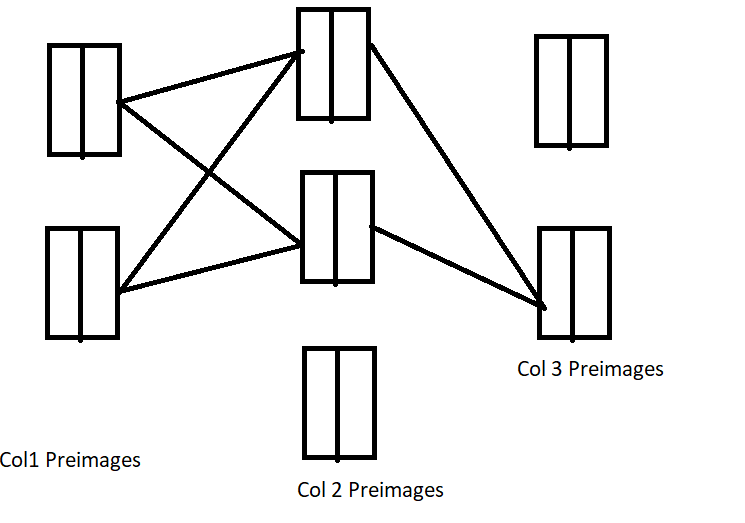


In [17]:
import numpy as np
import itertools as itr
def bool_to_int(g):
    bin_g=[]
    for row in g:
         bin_g.append([int(elem) for elem in row])
    return bin_g

def gen_col(col):
  
    rows=[list(item) for item in list(itr.product([0,1], repeat=2))]
    grid1=[np.array(item).reshape(2,2).tolist() for item in \
           list(itr.product([0,1], repeat=4)) if np.array(item).sum()==1]
    grid0=[np.array(item).reshape(2,2).tolist() for item in \
           list(itr.product([0,1], repeat=4)) if np.array(item).sum()!=1]

    if col[0]==1: 
        res=grid1
    else:
        res=grid0
    
    for elem in col[1:]:
        res_temp=[]
        for grid in res:
            for row in rows:
                if elem==1 and np.sum(grid[-1])+np.sum(row)==1: 
                    res_temp.append(grid+[row])
                elif elem==0 and np.sum(grid[-1])+np.sum(row)!=1:
                    res_temp.append(grid+[row])
        res=res_temp
        
    return np.array(res)


def solution(g):
    g=bool_to_int(g)
    g=np.array(g)
    col1=gen_col(g[:,0])
    
    col1_arr=np.array([image[:,1] for image in col1])
    col1_map={tuple(image):np.all(image==col1_arr, axis=1).sum() for image in col1_arr}

    #Column wise operations
    for i in range(1, len(g[0])):
        
        col2=gen_col(g[:,i])
        col2_map={}
        for image2 in col2:
                if tuple(image2[:,0]) in col1_map.keys():
                    if tuple(image2[:,1]) in col2_map.keys():
                        col2_map[tuple(image2[:,1])]=col1_map[tuple(image2[:,0])]+col2_map[tuple(image2[:,1])]
                    else:
                        col2_map[tuple(image2[:,1])]=col1_map[tuple(image2[:,0])]
                else:
                    pass
        col1_map=col2_map
        
    return sum(col1_map.values())


In [18]:
solution([[1,0,1],[0,1,0],[1,0,1]])

4

## Final Message ! 

{'success' : 'great', 'colleague' : 'esteemed', 'efforts' : 'incredible', 'achievement' : 'unlocked', 'rabbits' : 'safe', 'foo' : 'win!'}